Rita Kurban

Professor Shekhar

# Moore's Law

In [6]:
# Importing all the necessary packages.
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Loading and preprocessing data.
data = pd.read_csv("summaries.txt")

dates = []
for infos in data.testID:
    info = infos.split("-")
    if len(info) == 3 and int(info[1]) > 19900000:
        dates.append(int(info[1]))
    else:
        dates.append(None)
        
        
# Creating a new column in the data and dropping NAs.
data['dates'] = dates
data.dropna(inplace=True)

In [8]:
# Which benchmarks do we have?
data.benchType.unique()

array(['CFP95', 'CINT95', 'CFP2000', 'CINT2000', 'CINT2006', 'CFP2006'],
      dtype=object)

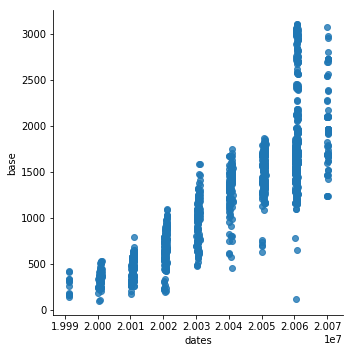

In [9]:
# Plotting data in a semi-log plot using "seaborn".
sns.lmplot("dates", "base", data=data[data.benchType == "CINT2000"],
           fit_reg=False) 
# The argument fit_reg plots the regression line automatically,
# but I will do it manually below.
plt.show()

In [12]:
# Creating a linear model and preprocessing data.

bases = data.base[data.benchType == "CINT2000"]
bases = bases.values.reshape(-1, 1) # To creare a list, not a df.
dates = data.dates[data.benchType == "CINT2000"]
dates = dates.values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(dates, bases)
pred = lm.predict(dates)

Mean squared error: 126381.24254352521
Variance score: 0.7156872664136025


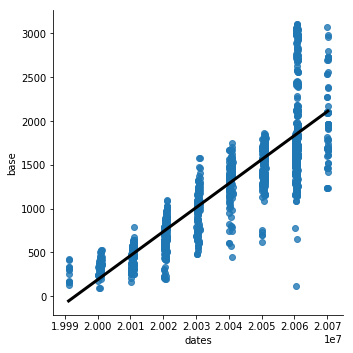

In [13]:
# MSE
print("Mean squared error: " + str(mean_squared_error(bases, pred)))
# R^2 (1 is perfect)
print('Variance score: ' + str(r2_score(bases, pred)))

# Plotting the original data
sns.lmplot("dates", "base", data=data[data.benchType == "CINT2000"],
           fit_reg=False)

# Plotting the regression line.
plt.plot(dates, pred, color='black', linewidth=3)
plt.show()

# Moore's law refers to an observation that the power of computers
# will increase exponentially. From the plot, we can say it's still
# holding up, which indicates that as time goes by the base speed of
# cpu will grow in an exponetial manner.

# MNIST Digits

In [14]:
# Loading all the necessary packages.
from sklearn import datasets
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

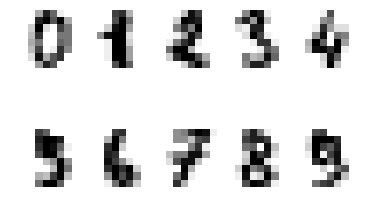

In [15]:
# Loading the dataset.
digits = datasets.load_digits()

# Plotting digits from 0 to 9.
examples = [digit for digit in list(zip(digits.images, digits.target))]
for index, (image, label) in enumerate(examples[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [18]:
# Extracting the images and their labels (3 and 8).
n = len(digits.images[(digits.target == 3) | (digits.target == 8)])
images = digits.images[(digits.target == 3) 
                       | (digits.target == 8)].reshape((n, -1))
labels = digits.target[(digits.target == 3) | (digits.target == 8)]

# Creating the train (70%) and test (30%) datasets.
y_train = labels[:int(n*.7)].reshape(-1,)
y_test  = labels[int(n*.7):].reshape(-1,)
x_train = images[:int(n*.7)]
x_test  = images[int(n*.7):]

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [19]:
print "Report for the classifier: "
print metrics.classification_report(y_test, pred)
print"Confusion matrix:"
print metrics.confusion_matrix(y_test, pred)

Report for the classifier: 
             precision    recall  f1-score   support

          3       1.00      0.96      0.98        55
          8       0.96      1.00      0.98        53

avg / total       0.98      0.98      0.98       108

Confusion matrix:
[[53  2]
 [ 0 53]]


# Exercise 1.14. 

N = total number of people; S = total amount of money;  P = the price of the ticket.

Each time we pick a number, we reduce the number of options left by one. So the total number of combinations (K) is:

K = 9 * 8 * 7 * 6 = 3024

It is possible to arrange 4 numbers in 24 different ways (k):

k = 4! = 4 * 3 * 2 * 1 = 24

The probability of winning:

P(win) = k/K = 24/3024 = 1/126 


Number of people who choose {3,5,7,9}:

N{3,5,7,9} = N * P({3,5,7,9}) = 1,000,000 *  1/100 = 10000

So, the maximum sum these people can win is £100:

S {3,5,7,9} = S / N{3,5,7,9} = 1000000/10000 = 100

An average amount that a person who picks {3,5,7,9} wins is £0.7937:

Avg{3,5,7,9} = S{3,5,7,9} * P(win) = 100 * 1/126 = 0.79

The average profit U:

U{3,5,7,9} = Avg{3,5,7,9} - P = -0.21


People who pick {1,2,3,4} are expected to win more —  £79.37, as the number of people who picked this combination is significantly lower:

Avg{1,2,3,4} = S{1,2,3,4} * P(win) = 1000000/100 * 1/126 = 79.37

U{1,2,3,4} = Avg{1,2,3,4} - P = 78.37


   In the first case, the expected win is lower than the price of the ticket, so the utility is negative. In the second case, it is positive.

   Since the numbers are picked randomly and there is no way to influence this random choice, the best strategy for a person is to choose the least popular numbers so that there is no need to split the win with hundreds of other people. A person just needs enough information about the most and least popular numbers to have a positive expected utility over long run.

# Exercise 13.5. 

   The fact that they achieved zero test error on every single problem seems to be very impressive. However, I’m pretty sure it is not possible to get large enough and reliable data sets for every problem ever published online. So, there is a strong need to carefully examine this claim as it might be overly ambitious or just incorrect. In fact, even if the company proves that their neural network achieves such results even on small data sets, there might be not enough data to validate these findings. Another issue is that this algorithm is only appropriate for problems that involve supervised learning where we first train the model on existing labels and then test it on a separate set of data. Unfortunately, WowCo.com’s product cannot address a massive set of problems that involve unsupervised learning as there are no labels the program can be trained on.

   To sum up, it is possible that the product does a great job predicting multiple problems of different sorts using supervised learning. However, it is not able to deal with unlabeled data (at least as described in the prompt) and so it cannot  “predict perfectly on all known problems.”
